# Solving the 1-D Schrodinger Equation
$$ i \hbar \frac{\partial \psi}{\partial t} = -\frac{\hbar^2}{2m} \frac{\partial^2\psi}{\partial x^2} + V(x)\psi $$

## Discretization (after dimensional analysis)

$$ i \frac{d\phi}{dt} = H \phi $$

where

$$H_{ij} = -\frac{1}{\Delta^2}\left(\delta_{i+1,j}-2\delta_{i,j}+\delta_{i-1,j}\right) + U_i \delta_{i,j} $$  


Formal solution:  

$$ \phi(t) = e^{-i H t} \phi(0) $$

Strategy:  
1. Solve for eigenvalues and eigenvectors of $H$  

$$ H \phi_n = \epsilon_n \phi_n $$  

2. Expand $\phi(0)$ in the basis of eigenvectors  

$$ \phi(0) = \sum_n c_n \phi_n $$  
where $c_n = \phi_n^{\dagger} \phi(0)$  

3. The state $\phi(t)$ is then given by  

\begin{eqnarray*}
\phi(t) &=& e^{-i H t} \phi(0) \\
&=& \sum_n c_n e^{-i\epsilon_n t}\phi_n
\end{eqnarray*}

## Example: Time evolution of free particle

Initial wavefunction: Gaussian


In [2]:
import numpy as np
from numpy import linalg as lin
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
%matplotlib inline

In [33]:
delta = 0.1
L = 10. 
N = 100 
dimension = 2*N + 1 # Number of lattice points.
x = np.linspace(-L,L,2*N+1)


In [34]:
def kronecker(i,j):
    return 1 if i==j else 0

def h(i,j):
    return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 

In [35]:
H = np.array( [[h(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix
H_eigenvalues, H_eigenvectors = lin.eig(H)
idx = H_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
H_eigenvalues = H_eigenvalues[idx] # Sorted eigenvalues
H_eigenvectors = H_eigenvectors[:,idx] # Sorted eigenvectors

In [44]:
###### The initial Gaussian wavefunction ##########
a = 1.0 ## Initial spread in units of l0
b = 0.0 ## Initial peak of the Gaussian
p0 = 0.0 ## Initial momentum in units of hbar/l0

In [45]:
def psi0(y):
    return (1/pow(np.pi*(a**2),0.25))*np.exp(-((y-b)**2)/(2.0*a**2) - 1j*p0*y)

In [46]:
Psi0 = np.sqrt(delta)*np.array( [psi0(delta*i) for i in range(-N,N+1)], 'complex' )

In [47]:
def Psi(t):
    sum = np.zeros(dimension, 'complex')
    for n in range(dimension):
        c = np.vdot(Psi0, H_eigenvectors[:,n]) # nth expansion coefficient 
        E = H_eigenvalues[n]
        sum += c * np.exp(-E*t*1.0j) * H_eigenvectors[:,n]
    return sum

def Prob(t):
    return np.array( [abs(Psi(t)[i])**2 for i in range(dimension)] )

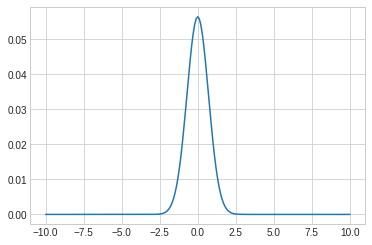

In [48]:
plt.plot(x, Prob(0))

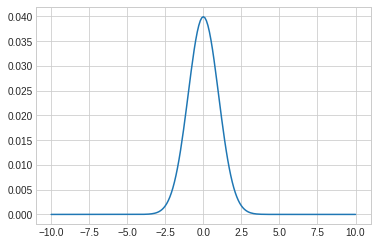

In [50]:
plt.plot(x, Prob(0.5))

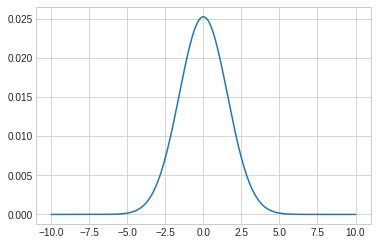

In [51]:
plt.plot(x, Prob(1.))